Lets import the necessary libraries to help in this analysis

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then read the data from the csv file

In [134]:
df = pd.read_csv('crime_data.csv')
df.head()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,2021,1/1/21,0,38,BLACK,UNKNOWN,MALE,Damage to Property,38.927,-77.006
1,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Simple Assault,38.925,-77.033
2,2021,1/1/21,0,35,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.900,-76.930
3,2021,1/1/21,0,31,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.849,-76.976
4,2021,1/1/21,0,21,BLACK,NOT HISPANIC,MALE,Weapon Violations,38.882,-76.925


Inquire the number of datapoints and columns

In [135]:
df.shape

(15653, 10)

In [136]:
df.columns

Index(['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude'],
      dtype='object')

Let us check for any missing values

In [137]:
df.isnull()

,Arrest Year,Arrest Date,Arrest Hour,Age,Defendant Race,Defendant Ethnicity,Defendant Sex,Arrest Category,Offense Latitude,Offense Longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15648,False,False,False,False,False,False,False,False,False,False
15649,False,False,False,False,False,False,False,False,False,False
15650,False,False,False,False,False,False,False,False,False,False
15651,False,False,False,False,False,False,False,False,False,False


In [138]:
features = ['Arrest Year', 'Arrest Date', 'Arrest Hour', 'Age', 'Defendant Race',
       'Defendant Ethnicity', 'Defendant Sex', 'Arrest Category',
       'Offense Latitude', 'Offense Longitude']

Check for missing values in all columns

In [139]:
for feature in features:
    null_check = pd.isnull(df[feature])
    print(df[null_check])

Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, Defendant Race, Defendant Ethnicity, Defendant Sex, Arrest Category, Offense Latitude, Offense Longitude]
Index: []
Empty DataFrame
Columns: [Arrest Year, Arrest Date, Arrest Hour, Age, 

We then drop all the rows with missing values

In [140]:
df = df.dropna()
df.shape

(15632, 10)

#### Arrest Pattern

##### Categorical Classification 

In [141]:
df['Arrest Category'].unique()

array(['Damage to Property', 'Simple Assault', 'Weapon Violations',
       'Narcotics', 'Other Crimes', 'Driving/Boating While Intoxicated',
       'Traffic Violations', 'Sex Offenses', 'Theft', 'Property Crimes',
       'Release Violations/Fugitive (Warr)',
       'Release Violations/Fugitive (Fug)',
       'Offenses Against Family & Children', 'Liquor Law Violations',
       'Assault with a Dangerous Weapon', 'Homicide',
       'Assault on a Police Officer', 'Burglary', 'Vending Violations',
       'Robbery', 'Motor Vehicle Theft', 'Sex Abuse',
       'Aggravated Assault', 'Disorderly Conduct', 'Gambling',
       'Kidnapping', 'Fraud and Financial Crimes',
       'Fraud and Financial Crimes (Frau)', 'Theft from Auto',
       'Prostitution', 'Fraud and Financial Crimes (Forg)',
       'Fraud and Financial Crimes (Coun)'], dtype=object)

In [142]:
df_sex = df.groupby('Defendant Sex').size().reset_index(name = 'Numbers')
df_sex

,Defendant Sex,Numbers
0,FEMALE,3419
1,MALE,12207
2,UNKNOWN,6


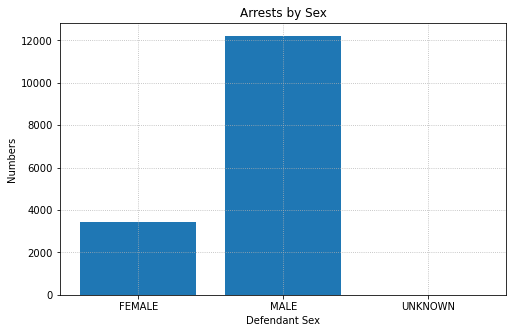

In [143]:
plt.figure(figsize = (8, 5))
plt.xlabel('Defendant Sex')
plt.title('Arrests by Sex')
plt.ylabel('Numbers')
x = df_sex['Defendant Sex']
y = df_sex['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')
plt.savefig('defendant_sex.jpg', dpi = 480)

###### Contionous Data Classification 

In [144]:
df_age = df.groupby('Age').size().reset_index(name = 'Numbers')
df_age

,Age,Numbers
0,18,275
1,19,311
2,20,390
3,21,483
4,22,447
...,...,...
64,83,1
65,85,1
66,88,1
67,120,4


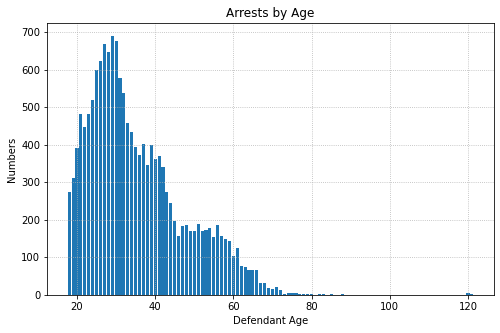

In [145]:
plt.figure(figsize = (8, 5))
plt.xlabel('Defendant Age')
plt.title('Arrests by Age')
plt.ylabel('Numbers')
x = df_age['Age']
y = df_age['Numbers']
plt.bar(x, y)
plt.grid(which = 'both', linestyle = ':')
#plt.savefig('defendant_sex.jpg', dpi = 480)

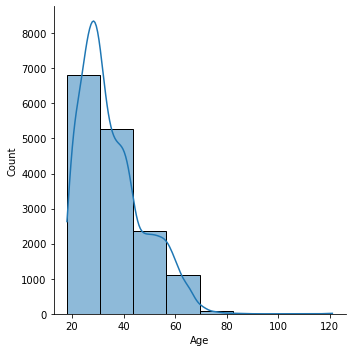

In [146]:
sns.displot(df['Age'], kde = True, bins = 8)

In [147]:
df_min = df['Age'].min()
df_max = df['Age'].max()
print(df_min, df_max)

18 121


##### Detecting Anomalies

The easiest way to detect anomalies in your dataset, is to use boxplots or whiskers

/Users/osoro/anaconda3/envs/OpenStreetMap/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

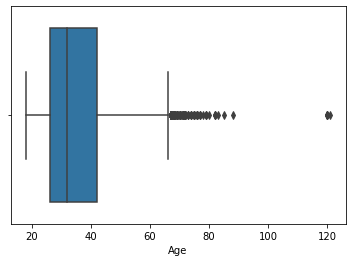

In [148]:
sns.boxplot(df['Age'])

Calculate the upper and the lower limits

In [149]:
q_1 = df['Age'].quantile(0.25)
q_3 = df['Age'].quantile(0.75)
iqr = q_3 - q_1
lower = q_1 - 1.5 * iqr
upper = q_3 + 1.5 * iqr

Create a boolean values to show outliers

In [150]:
upper_array = np.where(df['Age'] >= upper)[0]
lower_array = np.where(df['Age'] <= lower)[0]

Eliminate Outliers

In [151]:
df.drop(index = upper_array, inplace = True)
df.drop(index = lower_array, inplace = True)

In [152]:
df.shape

(15401, 10)